# Python Machine Learning - Code Examples

# Building Good Training Datasets – Data Preprocessing

In [2]:
%load_ext watermark
%watermark -a "Yoshua Putro" -u -d -p numpy,pandas,matplotlib,sklearn,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Yoshua Putro

Last updated: 2022-03-04

numpy     : 1.22.2
pandas    : 1.4.1
matplotlib: 3.5.1
sklearn   : 1.0.2
seaborn   : 0.11.2



<br>
<br>

In [5]:
from IPython.display import Image
%matplotlib inline

# Dealing with missing data

## Identifying missing values in tabular data

In [6]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
# access the underlying NumPy array
# via the `values` attribute
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

<br>
<br>

## Eliminating training examples or features with missing values

In [6]:
# remove rows that contain missing values

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
# only drop rows where all columns are NaN

df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
# drop rows that have fewer than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


<br>
<br>

## Imputing missing values

In [12]:
# again: our original array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [13]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

<br>
<br>

In [14]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Understanding the scikit-learn estimator API

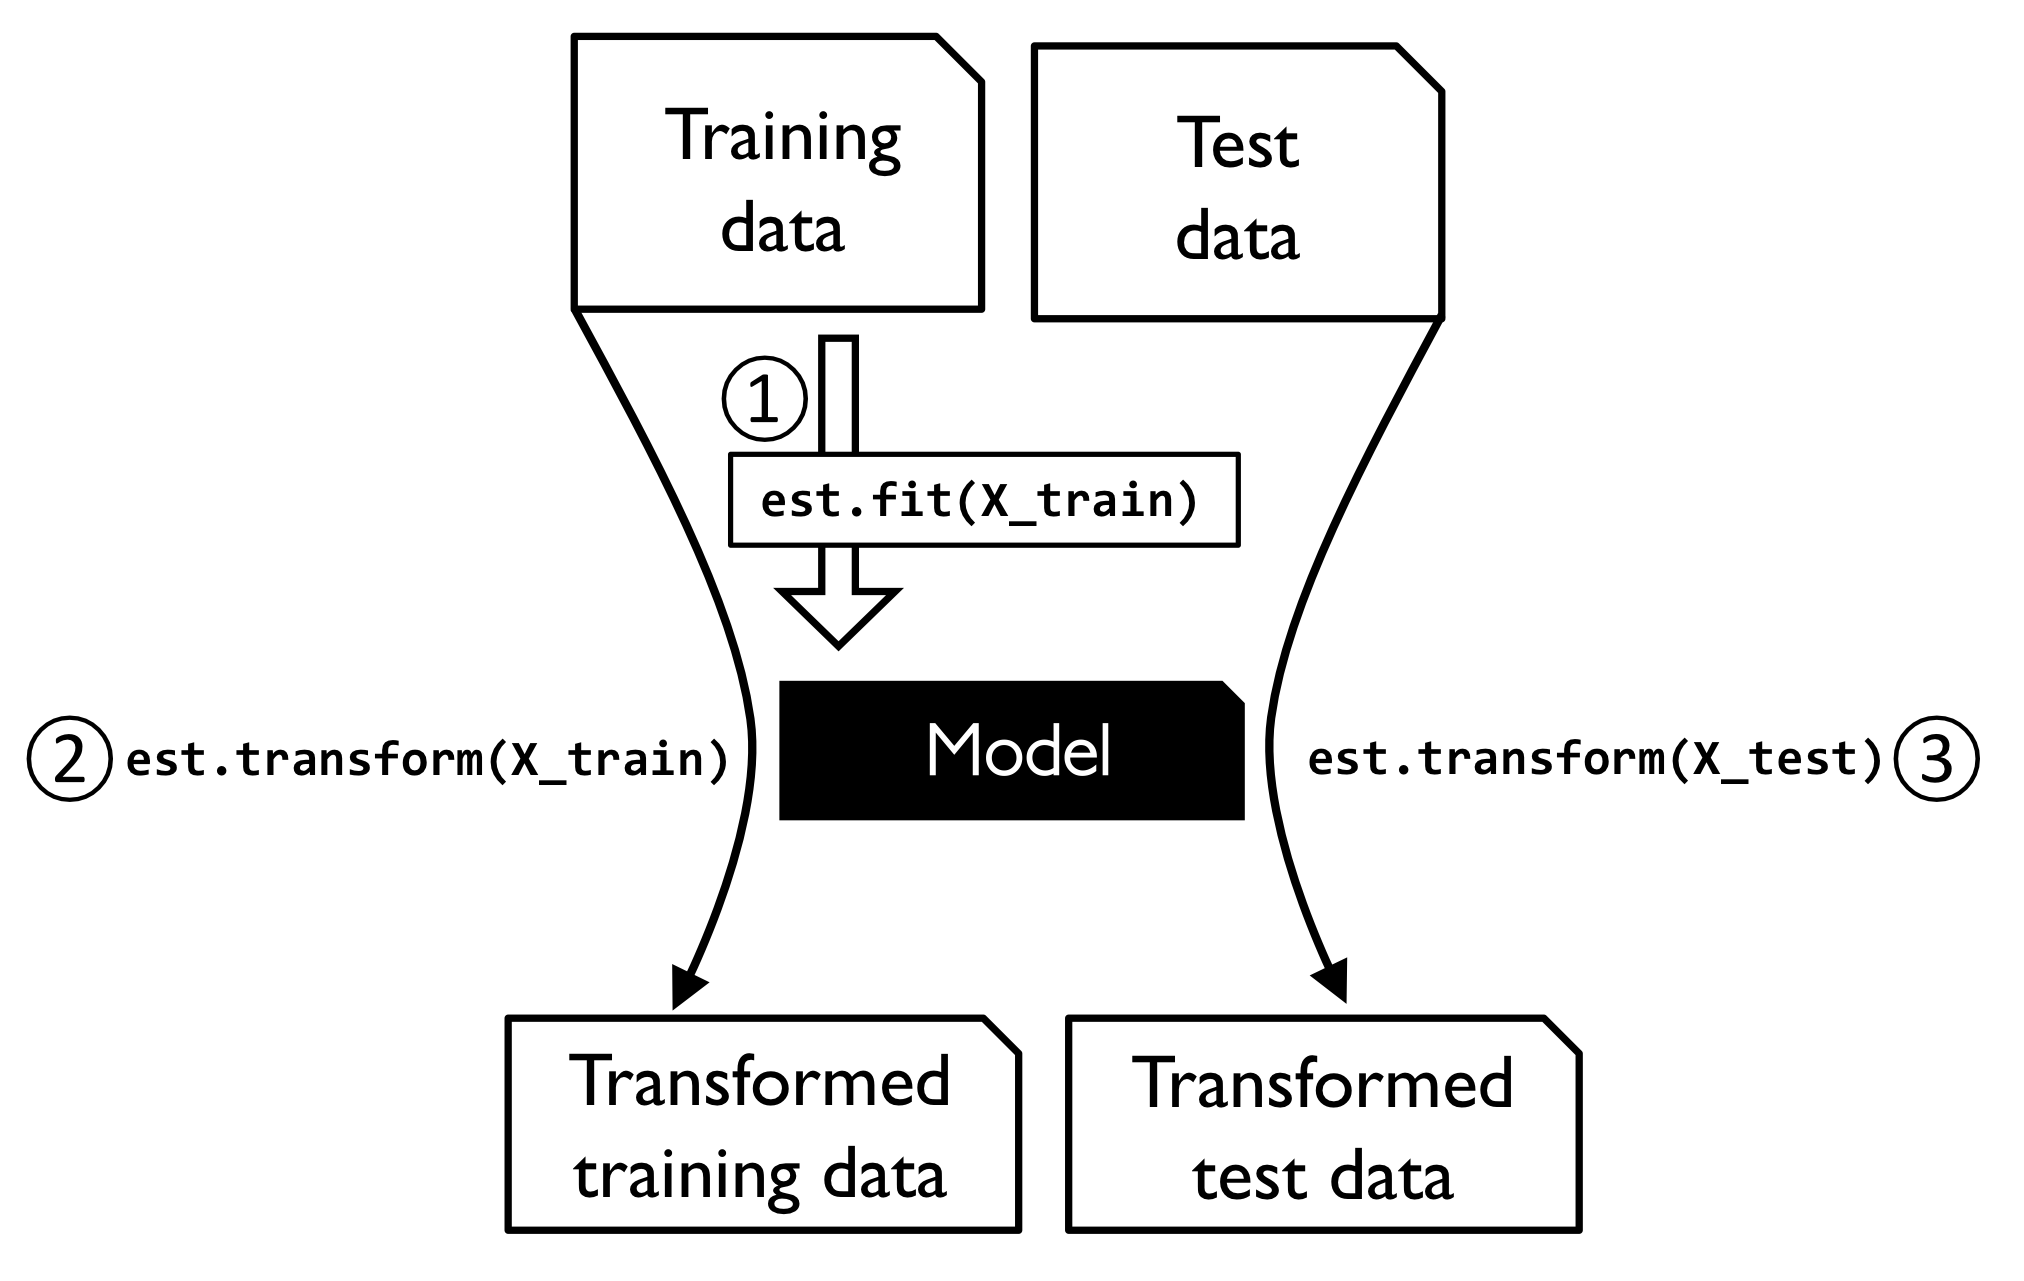

In [15]:
Image(filename='images/04_01.png', width=400) 

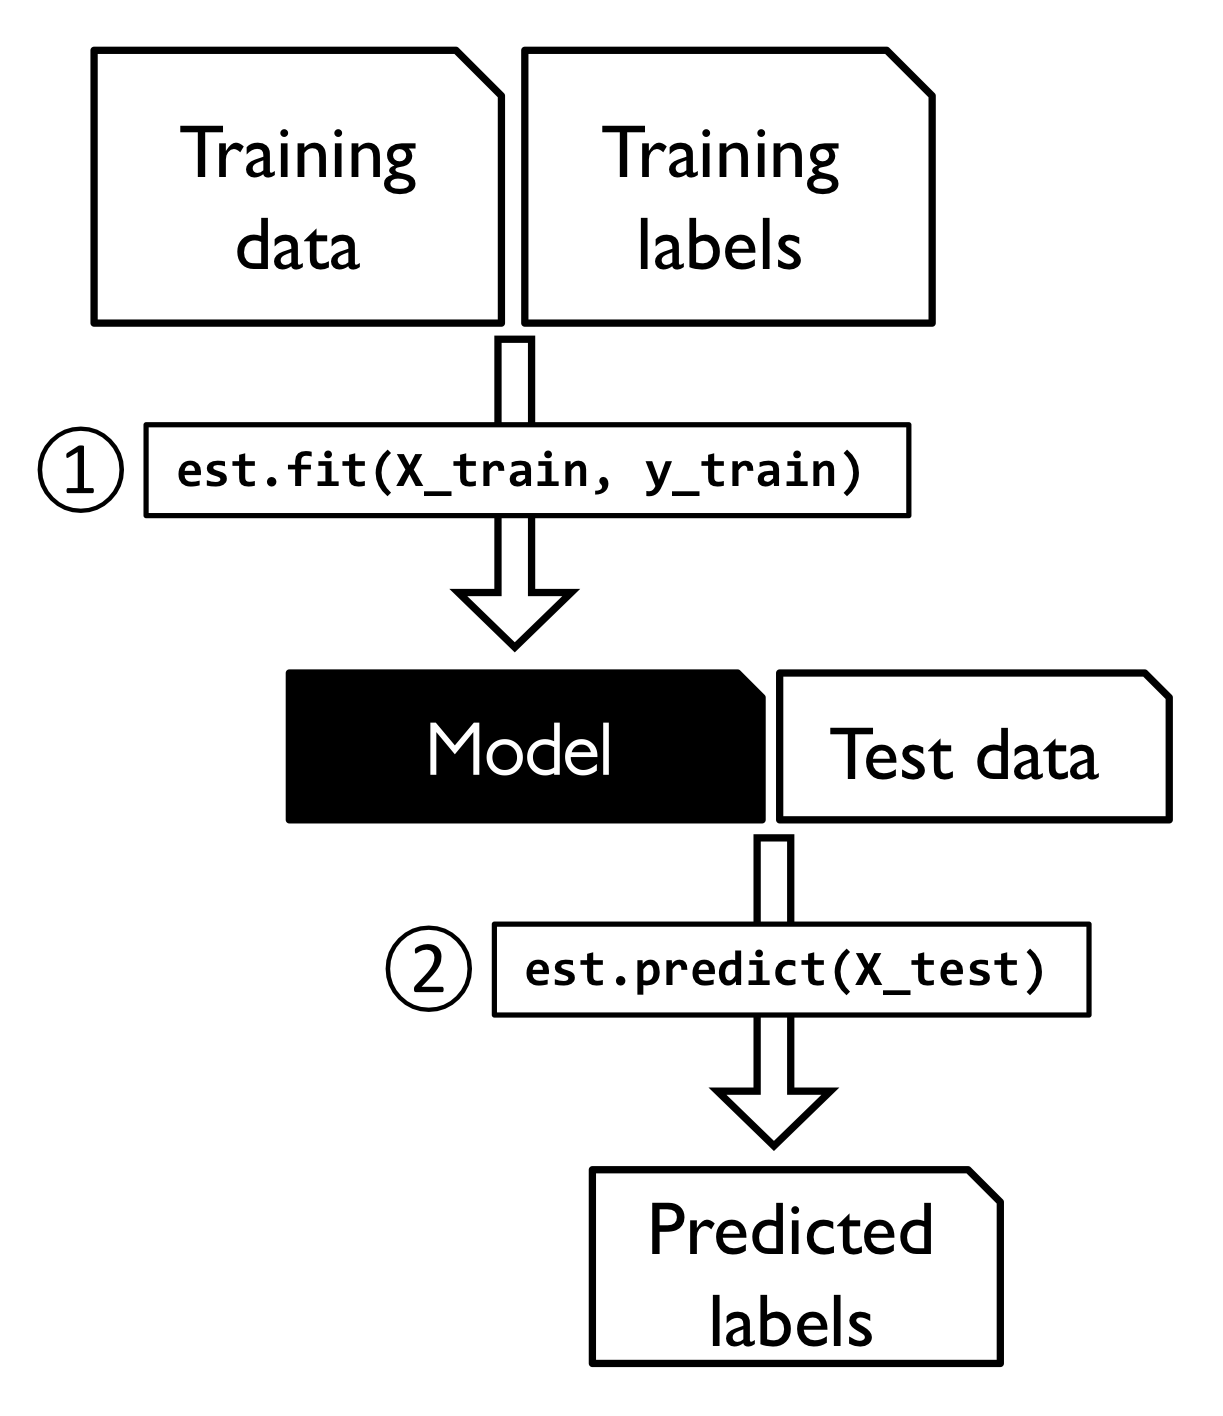

In [16]:
Image(filename='images/04_02.png', width=300) 

<br>
<br>

# Handling categorical data

## Nominal and ordinal features

Ordinal features can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M. In contrast, nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

In [8]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


<br>
<br>

## Mapping ordinal features

In [47]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,NaN
1,red,2,13.5,NaN
2,blue,3,15.3,NaN


In [48]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<br>
<br>

## Encoding class labels

Many machine learning libraries require that class labels are encoded as integer values. Although most estimators for classification in scikit-learn convert class labels to integers internally, it is considered good practice to provide class labels as integer arrays to avoid technical glitches. To encode the class labels, we can use an approach similar to the mapping of ordinal features discussed previously. We need to remember that class labels are not ordinal, and it doesn't matter which integer number we assign to a particular string-label. Thus, we can simply enumerate the class labels starting at 0:

In [49]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{nan: 2}

In [50]:
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,2
1,red,2,13.5,2
2,blue,3,15.3,2


In [51]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,NaN
1,red,2,13.5,NaN
2,blue,3,15.3,NaN


In [52]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 0, 0])

In [53]:
# reverse mapping
class_le.inverse_transform(y)

array([nan, nan, nan])

<br>
<br>

## Performing one-hot encoding on nominal features

Since scikit-learn's estimators treat class labels without any order, we used the convenient `LabelEncoder` class to encode the string labels into integers. It may appear that we could use a similar approach to transform the nominal color column of our dataset, as follows:

In [54]:
from sklearn.preprocessing import LabelEncoder
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

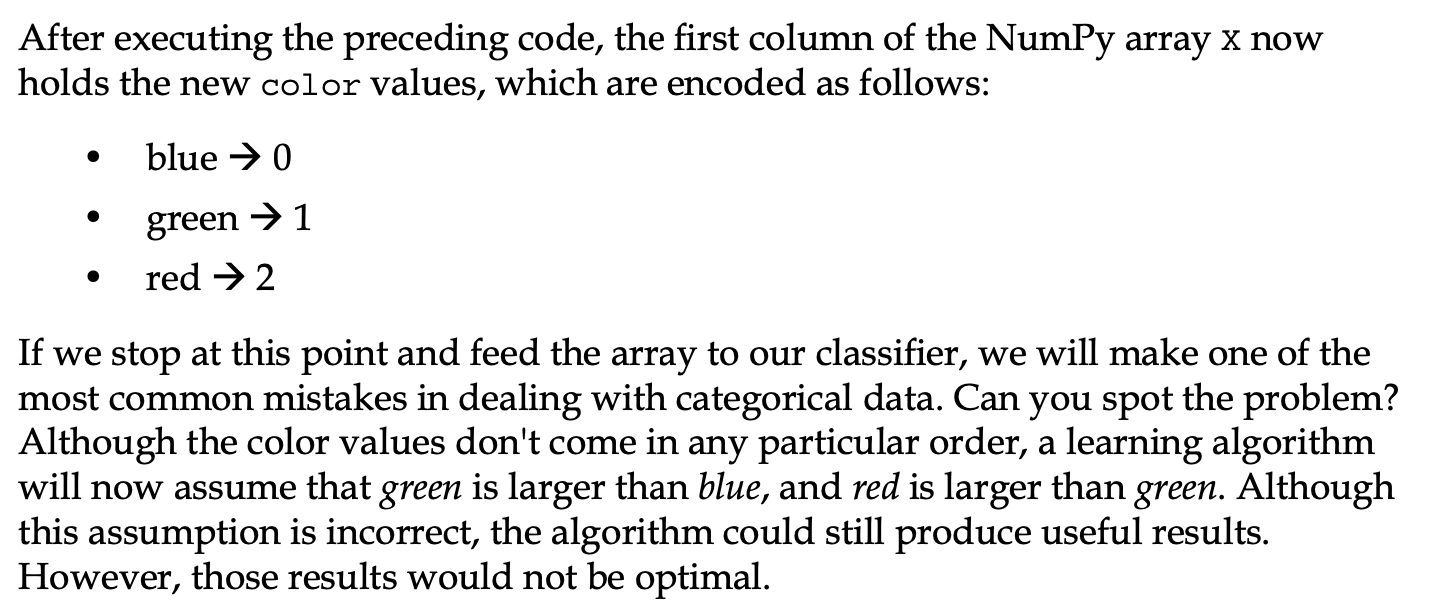

In [55]:
Image(filename='images/labelencoderproblem.png', width=800) 

In [59]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [57]:
# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [29]:
# multicollinearity guard in get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [60]:
# multicollinearity guard for the OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

<br>
<br>

## Optional: Encoding Ordinal Features

If we are unsure about the numerical differences between the categories of ordinal features, or the difference between two ordinal values is not defined, we can also encode them using a threshold encoding with 0/1 values. For example, we can split the feature "size" with values M, L, and XL into two new features "x > M" and "x > L". Let's consider the original DataFrame:

In [61]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


We can use the `apply` method of pandas' DataFrames to write custom lambda expressions in order to encode these variables using the value-threshold approach:

In [62]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


<br>
<br>

# Partitioning a dataset into a seperate training and test set

In [63]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

<br>
<br>

# Bringing features onto the same scale

In [65]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [66]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

A visual example:

In [67]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


## Titanic improved

In [69]:
#import the necessary libraries for dataset preparation, feature engineering, model training
import pandas as pd, string
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

/var/folders/8q/dw4kvzf540v8d2nt2r9xsq600000gn/T/ipykernel_46979/3175005844.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [70]:
#Import Training and Testing Data
train = pd.read_csv('train.csv')
print("Training Set:"% train.columns, train.shape)
test = pd.read_csv('test.csv')
print("Test Set:"% test.columns, test.shape)

Training Set: (891, 12)
Test Set: (418, 11)


In [71]:
#Percentage of Survived/Did not Survive shows that the training Data is not balanced.
print("Survived: ", train.Survived.value_counts()[1]/len(train)*100,"%")
print("Did not Survive: ", train.Survived.value_counts()[0]/len(train)*100,"%")

Survived:  38.38383838383838 %
Did not Survive:  61.61616161616161 %


In [85]:
# Obtain target and predictors
y = train.Survived.copy()
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features].copy()
X_test = test[features].copy()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


<AxesSubplot:xlabel='Fare'>

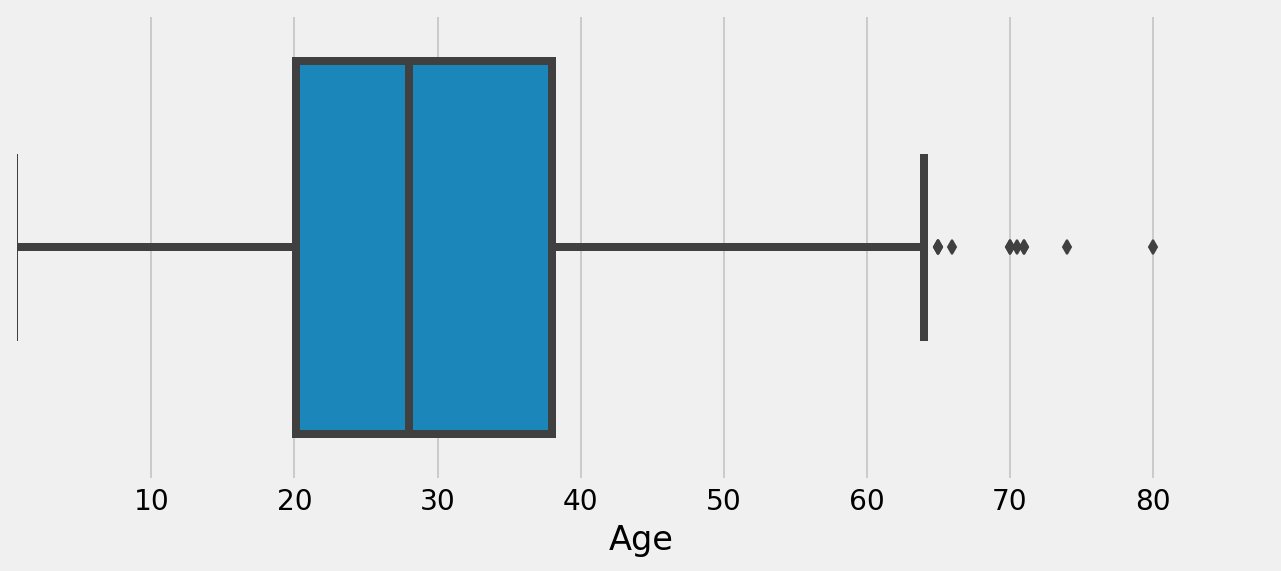

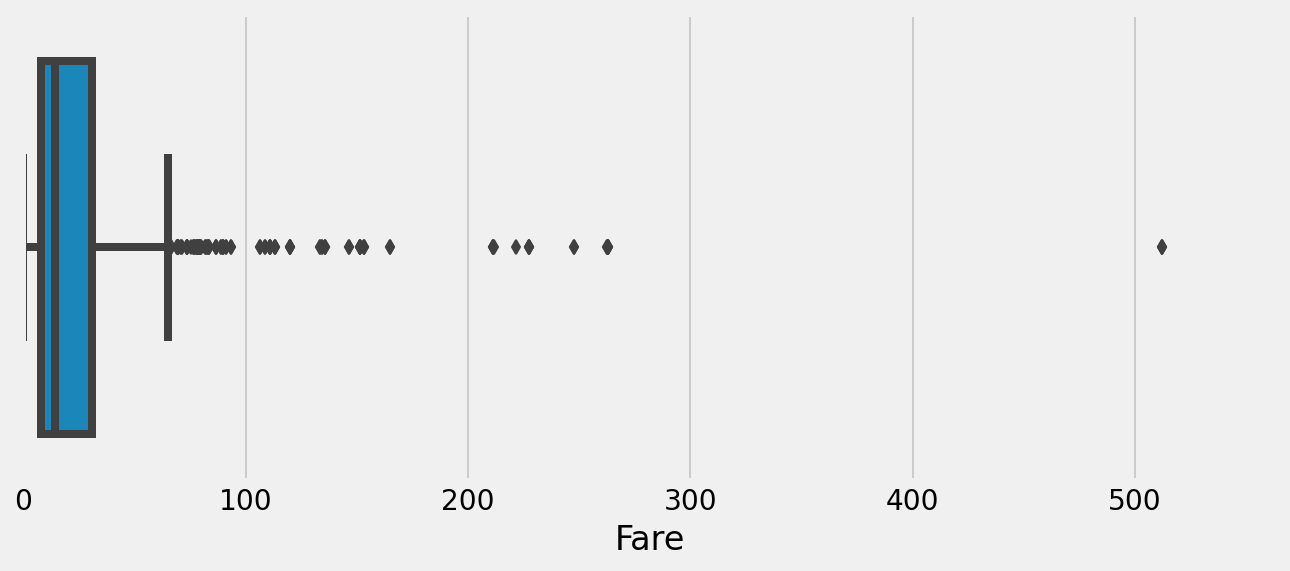

In [77]:
plt.figure(figsize=(10,4))
plt.xlim(train.Age.min(), train.Age.max()*1.1)
sns.boxplot(x=train.Age)
plt.figure(figsize=(10,4))
plt.xlim(train.Fare.min(), train.Fare.max()*1.1)
sns.boxplot(x=train.Fare)

We noticed that most of the passengers age is between 20 and 40. Also the fare shows that most of people paid less than 100 Pounds per ticket. 
Now let us get list of the Categorical variables:

In [78]:
# Get list of categorical variables
Obj_Type = (X.dtypes == 'object')
object_cols = list(Obj_Type[Obj_Type].index)
print("Categorical variables:")
print(object_cols)
#Categorical variables:
#['Sex', 'Embarked']

Categorical variables:
['Sex', 'Embarked']


In [90]:
X_test_le = X_test.copy()
X_le = X.copy()

when we use label encoding we have to convert null values into 0:

In [91]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    #make NAN as 0 Catgory Variable
    X_test_le[col] = label_encoder.fit_transform(X_test_le[col].fillna('0'))
    X_le[col] = label_encoder.fit_transform(X_le[col].fillna('0'))

In [80]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


<br>
<br>

In [146]:
X_test_ohe = pd.get_dummies(X_test)
X_ohe = pd.get_dummies(X)

In [94]:
X_test_ohe

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,NaN,0,0,8.0500,0,1,0,0,1


In [93]:
X_ohe

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [106]:
from sklearn.impute import SimpleImputer
#Imputation
my_imputer = SimpleImputer()
imputed_X_test = pd.DataFrame(my_imputer.fit_transform(X_test_le))
imputed_X = pd.DataFrame(my_imputer.fit_transform(X_le))

#Imputation removed column names; put them back
imputed_X_test.columns = X_test.columns
imputed_X.columns = X.columns

In [107]:
imputed_X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [108]:
X_test_le.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [109]:
imputed_X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [110]:
imputed_X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,34.50000,0.0,0.0,7.8292,1.0
1,3.0,0.0,47.00000,1.0,0.0,7.0000,2.0
2,2.0,1.0,62.00000,0.0,0.0,9.6875,1.0
3,3.0,1.0,27.00000,0.0,0.0,8.6625,2.0
4,3.0,0.0,22.00000,1.0,1.0,12.2875,2.0
...,...,...,...,...,...,...,...
413,3.0,1.0,30.27259,0.0,0.0,8.0500,2.0
414,1.0,0.0,39.00000,0.0,0.0,108.9000,0.0
415,3.0,1.0,38.50000,0.0,0.0,7.2500,2.0
416,3.0,1.0,30.27259,0.0,0.0,8.0500,2.0



Now we have fixed the training data and it is time to make our experiment on the training data, so let us split the training set into training and validation:

In [111]:
#Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(imputed_X, y, train_size=0.8, test_size=0.2,
 random_state=0)

In [112]:
from sklearn.linear_model import LogisticRegression

In [177]:
logisticRegr = LogisticRegression(max_iter=10000000)

In [116]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [117]:
score = logisticRegr.score(X_valid, y_valid)
print(score)

0.7988826815642458


## Using OHE

In [160]:
from sklearn.impute import SimpleImputer
#Imputation
my_imputer = SimpleImputer()
imputed_X = pd.DataFrame(my_imputer.fit_transform(X_ohe))

#Imputation removed column names; put them back
imputed_X.columns = X_ohe.columns

In [161]:
#Break off validation set from training data
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(imputed_X, y, train_size=0.8, test_size=0.2,
 random_state=0)

In [178]:
logisticRegr_ = LogisticRegression(max_iter=10000000)

In [179]:
logisticRegr_.fit(X_train_, y_train_)

LogisticRegression(max_iter=10000000)

In [180]:
score = logisticRegr_.score(X_valid_, y_valid_)
print(score)

0.7988826815642458


In [181]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(imputed_X)

In [182]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(X_train_std, y, train_size=0.8, test_size=0.2,
 random_state=0)

In [183]:
logisticRegr_.fit(X_train_, y_train_)

LogisticRegression(max_iter=10000000)

In [184]:
score = logisticRegr_.score(X_valid_, y_valid_)
print(score)

0.7988826815642458
